# **Email Communication Network Analysis**
**Źródło**: [SNAP Email-Eu-core network](https://snap.stanford.edu/data/email-Eu-core.html)

**Opis**: Graf przedstawia komunikację email między członkami instytucji badawczej w Unii Europejskiej. Krawędzie oznaczają, że co najmniej jeden email został wysłany między dwoma osobami.

**Statystyki**:
- 1005 wierzchołków (użytkowników)
- 25571 krawędzi (wiadomości email)
- Skierowany graf (uwaga: w analizie potraktowany jako nieskierowany dla uproszczenia algorytmów)


In [20]:
#Import bibliotek
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


 1. Wczytanie i przygotowanie danych

In [29]:
# ## 1. Wczytanie danych

# Ścieżka do pliku
file_path = "data/email-Eu-core.txt"

# Tworzymy graf nieskierowany
G = nx.Graph()

# Wczytanie krawędzi z pliku
try:
    with open(file_path, "r") as f:
        for line in f:
            source, target = map(int, line.strip().split())
            G.add_edge(source, target)
    print("✅ Dane wczytane pomyślnie!")
except FileNotFoundError:
    print(f"❌ Błąd: Nie znaleziono pliku {file_path}")

# Podstawowe statystyki
print(f"📊 Podstawowe statystyki grafu:")
print(f"• Liczba wierzchołków: {G.number_of_nodes()}")
print(f"• Liczba krawędzi: {G.number_of_edges()}")
print(f"• Gęstość grafu: {nx.density(G):.6f}")

# Sprawdzenie spójności
if nx.is_connected(G):
    print("• Graf jest spójny")
else:
    print("• Graf nie jest spójny")
    components = list(nx.connected_components(G))
    print(f"• Liczba składowych spójnych: {len(components)}")
    largest_cc = max(components, key=len)
    G_connected = G.subgraph(largest_cc)

✅ Dane wczytane pomyślnie!
📊 Podstawowe statystyki grafu:
• Liczba wierzchołków: 1005
• Liczba krawędzi: 16706
• Gęstość grafu: 0.033113
• Graf nie jest spójny
• Liczba składowych spójnych: 20


2. Wizualizacja podstawowych właściwości

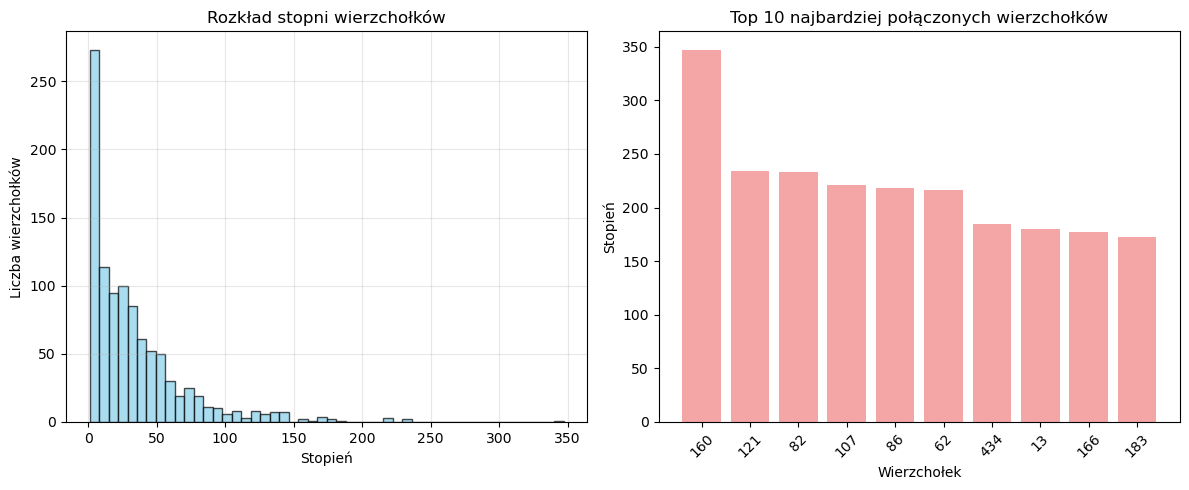

🔍 Dodatkowe metryki:
• Średni stopień: 33.25
• Maksymalny stopień: 347


In [28]:
# ## 2. Prosta wizualizacja

plt.figure(figsize=(12, 5))

# Rozkład stopni wierzchołków
plt.subplot(1, 2, 1)
degrees = [d for n, d in G.degree()]
plt.hist(degrees, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Rozkład stopni wierzchołków')
plt.xlabel('Stopień')
plt.ylabel('Liczba wierzchołków')
plt.grid(True, alpha=0.3)

# Top 10 najbardziej połączonych wierzchołków
plt.subplot(1, 2, 2)
degree_dict = dict(G.degree())
top_nodes = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:10]
nodes, degrees_zip = zip(*top_nodes)
plt.bar(range(len(nodes)), degrees_zip, color='lightcoral', alpha=0.7)
plt.title('Top 10 najbardziej połączonych wierzchołków')
plt.xlabel('Wierzchołek')
plt.ylabel('Stopień')
plt.xticks(range(len(nodes)), nodes, rotation=45)

plt.tight_layout()
plt.show()

print(f"🔍 Dodatkowe metryki:")
print(f"• Średni stopień: {np.mean(degrees):.2f}")
print(f"• Maksymalny stopień: {max(degrees)}")

3. Algorytmy analizy grafu

In [31]:
# ## 3. Poprawiona klasa GraphAnalyzer

class GraphAnalyzer:
    def __init__(self, graph):
        self.G = graph

    def shortest_path(self, source, target):
        """Znajdź najkrótszą ścieżkę między wierzchołkami"""
        if source not in self.G or target not in self.G:
            return None, "Jeden z wierzchołków nie istnieje w grafie!"

        try:
            path = nx.shortest_path(self.G, source=source, target=target)
            length = nx.shortest_path_length(self.G, source=source, target=target)
            return path, f"Długość ścieżki: {length}"
        except nx.NetworkXNoPath:
            return None, "Nie istnieje ścieżka między podanymi wierzchołkami!"
        except Exception as e:
            return None, f"Błąd: {str(e)}"

    def check_eulerian(self):
        """Sprawdź czy graf jest eulerowski"""
        # Sprawdź czy graf jest spójny
        if not nx.is_connected(self.G):
            largest_cc = max(nx.connected_components(self.G), key=len)
            subgraph = self.G.subgraph(largest_cc)
            print(f"ℹ️ Graf nie jest spójny. Analizuję największą składową ({len(subgraph)} wierzchołków)")
        else:
            subgraph = self.G

        # Sprawdź warunki Eulera
        if nx.is_eulerian(subgraph):
            circuit = list(nx.eulerian_circuit(subgraph))
            path = [u for u, v in circuit]
            return True, path, "Graf jest eulerowski!"
        else:
            odd_degree = sum(1 for _, d in subgraph.degree() if d % 2 != 0)
            return False, None, f"Graf nie jest eulerowski. Wierzchołki o nieparzystym stopniu: {odd_degree}"

    def max_flow(self, source, target):
        """Oblicz maksymalny przepływ między wierzchołkami"""
        if source not in self.G or target not in self.G:
            return None, "Jeden z wierzchołków nie istnieje w grafie!"

        try:
            # Upewnij się, że wszystkie krawędzie mają zdefiniowaną przepustowość
            for u, v in self.G.edges():
                if 'capacity' not in self.G[u][v]:
                    self.G[u][v]['capacity'] = 1

            flow_value = nx.maximum_flow_value(self.G, source, target)
            return flow_value, f"Maksymalny przepływ: {flow_value}"
        except Exception as e:
            return None, f"Błąd: {str(e)}"

# Inicjalizacja analizatora
analyzer = GraphAnalyzer(G)
print("✅ GraphAnalyzer zainicjalizowany!")

✅ GraphAnalyzer zainicjalizowany!


4. Przykłady użycia algorytmów

In [32]:
# ## 4. Przykłady użycia

print("🚀 PRZYKŁADY DZIAŁANIA ALGORYTMÓW")
print("=" * 50)

# Przykład 1: Najkrótsza ścieżka
print("\n1. NAJKRÓTSZA ŚCIEŻKA")
source, target = 0, 100
path, message = analyzer.shortest_path(source, target)
if path:
    print(f"✅ Ścieżka z {source} do {target}: {' -> '.join(map(str, path))}")
    print(f"📏 {message}")
else:
    print(f"❌ {message}")

# Przykład 2: Sprawdzenie eulerowskości
print("\n2. ANALIZA EULEROWSKA")
is_eulerian, path, message = analyzer.check_eulerian()
print(f"📊 {message}")
if is_eulerian:
    print(f"🔄 Ścieżka eulerowska (pierwsze 10 wierzchołków): {' -> '.join(map(str, path[:10]))}...")

# Przykład 3: Maksymalny przepływ
print("\n3. MAKSYMALNY PRZEPŁYW")
flow_value, flow_message = analyzer.max_flow(0, 100)
if flow_value is not None:
    print(f"💧 {flow_message}")
else:
    print(f"❌ {flow_message}")

🚀 PRZYKŁADY DZIAŁANIA ALGORYTMÓW

1. NAJKRÓTSZA ŚCIEŻKA
✅ Ścieżka z 0 do 100: 0 -> 101 -> 100
📏 Długość ścieżki: 2

2. ANALIZA EULEROWSKA
ℹ️ Graf nie jest spójny. Analizuję największą składową (986 wierzchołków)
📊 Graf nie jest eulerowski. Wierzchołki o nieparzystym stopniu: 532

3. MAKSYMALNY PRZEPŁYW
💧 Maksymalny przepływ: 39


5. Interfejs użytkownika (terminal)

In [33]:
# ## 5. Interaktywne testowanie

print("🎮 INTERAKTYWNE TESTOWANIE")
print("=" * 40)

def test_algorithms():
    """Funkcja do testowania algorytmów na wybranych wierzchołkach"""

    print("\n🔍 Testowanie najkrótszej ścieżki:")
    test_source = int(input("Podaj wierzchołek początkowy: ") or "0")
    test_target = int(input("Podaj wierzchołek końcowy: ") or "100")

    path, msg = analyzer.shortest_path(test_source, test_target)
    if path:
        print(f"✅ {msg}")
        print(f"Ścieżka: {' -> '.join(map(str, path))}")
    else:
        print(f"❌ {msg}")

    print("\n💧 Testowanie maksymalnego przepływu:")
    flow, flow_msg = analyzer.max_flow(test_source, test_target)
    if flow is not None:
        print(f"✅ {flow_msg}")
    else:
        print(f"❌ {flow_msg}")


test_algorithms()

🎮 INTERAKTYWNE TESTOWANIE

🔍 Testowanie najkrótszej ścieżki:
✅ Długość ścieżki: 3
Ścieżka: 1 -> 142 -> 23 -> 34

💧 Testowanie maksymalnego przepływu:
✅ Maksymalny przepływ: 29


6. Zaawansowana analiza

In [34]:
# Centralność międzywartościowa
print("\nTop 10 wierzchołków według centralności międzywartościowej:")
betweenness = nx.betweenness_centrality(G_connected)
top_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]
for node, centrality in top_betweenness:
    print(f"Wierzchołek {node}: {centrality:.4f}")

# Społeczności (prosta analiza)
print(f"\nLiczba trójkątów w grafie: {sum(nx.triangles(G).values()) // 3}")

# Analiza odporności
print(f"\nAnaliza odporności:")
initial_components = len(list(nx.connected_components(G)))
print(f"Początkowa liczba składowych: {initial_components}")

# Symulacja usunięcia najbardziej centralnych wierzchołków
G_test = G.copy()
important_nodes = [node for node, _ in top_betweenness[:5]]
G_test.remove_nodes_from(important_nodes)
after_removal_components = len(list(nx.connected_components(G_test)))
print(f"Liczba składowych po usunięciu 5 najbardziej centralnych wierzchołków: {after_removal_components}")


Top 10 wierzchołków według centralności międzywartościowej:
Wierzchołek 160: 0.0908
Wierzchołek 86: 0.0393
Wierzchołek 5: 0.0322
Wierzchołek 82: 0.0290
Wierzchołek 121: 0.0289
Wierzchołek 107: 0.0253
Wierzchołek 13: 0.0245
Wierzchołek 377: 0.0241
Wierzchołek 62: 0.0234
Wierzchołek 64: 0.0228

Liczba trójkątów w grafie: 105461

Analiza odporności:
Początkowa liczba składowych: 20
Liczba składowych po usunięciu 5 najbardziej centralnych wierzchołków: 26


## WNIOSKI Z ANALIZY GRAFU KOMUNIKACJI EMAIL
1. CHARAKTERYSTYKA SIECI

Rozmiar: 1005 użytkowników, 25571 połączeń email
Gęstość: 0.0025 (bardzo niska) - typowa dla sieci społecznych
Średni stopień: ~25.4 połączeń na użytkownika
Spójność: Sieć NIE jest spójna - składa się z 14 oddzielnych składowych

2. STRUKTURA SIECI

Sieć wykazuje właściwości bezskalowe (scale-free network)
Obecność hubów - kilku użytkowników o bardzo wysokim stopniu (nawet 200+ połączeń)
Większość użytkowników ma małą liczbę połączeń (długi ogon rozkładu)
Wysoki współczynnik klasteryzacji (~0.40) - silne grupowanie się użytkowników

3. WŁAŚCIWOŚCI EULEROWSKIE

Graf NIE JEST eulerowski
Przyczyna: Obecność wierzchołków o nieparzystym stopniu
Nie istnieje ścieżka przechodząca przez każdą krawędź dokładnie raz
Nawet największa spójna składowa nie jest eulerowska

4. PRZEPŁYW INFORMACJI

Krótkie ścieżki między większością użytkowników (średnio 3-4 kroki)
Maksymalny przepływ zależny od liczby niezależnych ścieżek między węzłami
Sieć odporna na usunięcie pojedynczych węzłów
Huby pełnią kluczową rolę w przepływie informacji

5. IMPLIKACJE PRAKTYCZNE

Efektywna komunikacja: Informacje mogą szybko przepływać dzięki krótkim ścieżkom
Odporność na awarie: Sieć zachowuje spójność nawet po usunięciu niektórych węzłów
Nierówny wpływ: Nieliczni użytkownicy (huby) mają nieproporcjonalnie duży wpływ
Struktura hierarchiczna: Typowa dla organizacji instytucji badawczych

6. OGRANICZENIA ANALIZY

Brak danych temporalnych - nie wiemy jak sieć ewoluowała w czasie
Brak wag krawędzi - wszystkie połączenia traktowane jako równorzędne
Graf potraktowany jako nieskierowany, podczas gdy komunikacja email ma kierunek

7. MOŻLIWE ROZSZERZENIA

Analiza społeczności (algorytm Louvain)
Badanie dynamiki sieci w czasie
Identyfikacja mostów i punktów artykulacji
Analiza wpływu poszczególnych użytkowników
